In [3]:
import numpy as np
import pandas as pd

### Transpose a data frame

In [4]:
df = pd.DataFrame({
    'key1' : ['a', 'a', 'b', 'b', 'a'],
    'key2' : ['one', 'two', 'one', 'two', 'one'],
    'data1' : np.random.randn(5),
    'data2' : np.random.randn(5)
}); df

,data1,data2,key1,key2
0,-1.100128,-0.997773,a,one
1,1.242132,-0.405933,a,two
2,-0.468848,-0.046384,b,one
3,0.412120,0.240435,b,two
4,0.800957,1.025921,a,one


In [5]:
df.head(1)

,data1,data2,key1,key2
0,-1.100128,-0.997773,a,one


In [6]:
df.head(1).transpose()

,0
data1,-1.10013
data2,-0.997773
key1,a
key2,one


In [7]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

### Converting a data frame index to a column

In [9]:
data = pd.DataFrame({
    'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
    'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]
}); data

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [10]:
data.reset_index(level=0, inplace=True); data

,index,group,ounces
0,0,a,4.0
1,1,a,3.0
2,2,a,12.0
3,3,b,6.0
4,4,b,7.5
5,5,b,8.0
6,6,c,3.0
7,7,c,5.0
8,8,c,6.0


### How to set the data frame's index to be one of the columns

In [18]:
col = ['a', 'b', 'c']
data = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=col); data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [19]:
data = data.set_index('a'); data

,b,c
a,,
1,2,3
4,5,6
7,8,9


In [20]:
# remove the index name 'a', not index
data.index.name = None; data

,b,c
1,2,3
4,5,6
7,8,9


### How to add or fill in missing dates

In [29]:
idx = pd.date_range('09-01-2013', '09-30-2013'); idx

DatetimeIndex(['2013-09-01', '2013-09-02', '2013-09-03', '2013-09-04',
               '2013-09-05', '2013-09-06', '2013-09-07', '2013-09-08',
               '2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12',
               '2013-09-13', '2013-09-14', '2013-09-15', '2013-09-16',
               '2013-09-17', '2013-09-18', '2013-09-19', '2013-09-20',
               '2013-09-21', '2013-09-22', '2013-09-23', '2013-09-24',
               '2013-09-25', '2013-09-26', '2013-09-27', '2013-09-28',
               '2013-09-29', '2013-09-30'],
              dtype='datetime64[ns]', freq='D')

In [30]:
len(idx), type(idx), idx.size, idx.shape

(30, pandas.tseries.index.DatetimeIndex, 30, (30,))

In [31]:
s = pd.Series({
    '09-02-2013': 2,
    '09-03-2013': 10,
    '09-06-2013': 5,
    '09-07-2013': 1
}); s

09-02-2013     2
09-03-2013    10
09-06-2013     5
09-07-2013     1
dtype: int64

In [32]:
# fill the data
s.index # index

Index(['09-02-2013', '09-03-2013', '09-06-2013', '09-07-2013'], dtype='object')

In [33]:
s.index = pd.DatetimeIndex(s.index)

In [34]:
s.index # DateTimeIndex

DatetimeIndex(['2013-09-02', '2013-09-03', '2013-09-06', '2013-09-07'], dtype='datetime64[ns]', freq=None)

In [35]:
s = s.reindex(idx, fill_value=0) # convert type s to 'DateTimeIndex' to similar to type of s

In [36]:
s

2013-09-01     0
2013-09-02     2
2013-09-03    10
2013-09-04     0
2013-09-05     0
2013-09-06     5
2013-09-07     1
2013-09-08     0
2013-09-09     0
2013-09-10     0
2013-09-11     0
2013-09-12     0
2013-09-13     0
2013-09-14     0
2013-09-15     0
2013-09-16     0
2013-09-17     0
2013-09-18     0
2013-09-19     0
2013-09-20     0
2013-09-21     0
2013-09-22     0
2013-09-23     0
2013-09-24     0
2013-09-25     0
2013-09-26     0
2013-09-27     0
2013-09-28     0
2013-09-29     0
2013-09-30     0
Freq: D, dtype: int64

### How to convert data in wide format to long format using pd.melt()

In [39]:
from pandas_datareader import data as web
from datetime import datetime
import pandas as pd

In [40]:
stocks = {
    'tech': ['GOOGL', 'MSFT', 'LNKD', 'YHOO', 'FB','HPQ','AMZN'],
    'auto':['TM','F','GM','HMC','NSANY','HYMTF'],
    'housing':['HD','WMT','LOW']
}

In [44]:
start_date = datetime(2016, 1, 30) # year - month - day
end_date = datetime(2016, 11, 30)

In [45]:
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']

In [46]:
df = pd.DataFrame({n: get_px(n, start_date, end_date) for n in stocks['tech']})

In [47]:
df.head(10)

,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
Date,,,,,,,
2016-02-01,574.809998,115.089996,770.770020,9.527557,205.759995,52.927964,29.570000
2016-02-02,552.099976,114.610001,780.909973,9.441550,203.429993,51.273663,29.059999
2016-02-03,531.070007,112.690002,749.380005,9.221757,191.250000,50.461024,27.680000
2016-02-04,536.260010,110.489998,730.030029,9.422437,192.279999,50.306236,29.150000
2016-02-05,502.130005,104.070000,703.760010,9.470219,108.379997,48.526169,27.969999
2016-02-08,488.100006,99.750000,704.159973,8.954183,109.970001,47.800598,27.049999
2016-02-09,482.070007,99.540001,701.020020,8.782170,100.980003,47.674832,26.820000
2016-02-10,490.480011,101.000000,706.849976,8.868176,101.760002,48.090826,27.100000
2016-02-11,503.820007,101.910004,706.359985,8.619715,103.470001,48.071477,26.760000


In [49]:
# create a column from the index values
df.reset_index(level=0, inplace=True); df.head(10)

,Date,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
0,2016-02-01,574.809998,115.089996,770.770020,9.527557,205.759995,52.927964,29.570000
1,2016-02-02,552.099976,114.610001,780.909973,9.441550,203.429993,51.273663,29.059999
2,2016-02-03,531.070007,112.690002,749.380005,9.221757,191.250000,50.461024,27.680000
3,2016-02-04,536.260010,110.489998,730.030029,9.422437,192.279999,50.306236,29.150000
4,2016-02-05,502.130005,104.070000,703.760010,9.470219,108.379997,48.526169,27.969999
5,2016-02-08,488.100006,99.750000,704.159973,8.954183,109.970001,47.800598,27.049999
6,2016-02-09,482.070007,99.540001,701.020020,8.782170,100.980003,47.674832,26.820000
7,2016-02-10,490.480011,101.000000,706.849976,8.868176,101.760002,48.090826,27.100000
8,2016-02-11,503.820007,101.910004,706.359985,8.619715,103.470001,48.071477,26.760000
9,2016-02-12,507.079987,102.010002,706.890015,9.001964,101.110001,48.855094,27.040001


In [50]:
pd.melt?

In [51]:
# "Unpivots" a DataFrame from wide format to long format
df_long = pd.melt?

In [56]:
# id_vars : tuple, list, or ndarray, optional. Column(s) to use as identifier variables.
df_long = pd.melt(df, id_vars=['Date']).dropna(); df_long.head(10)

,Date,variable,value
0,2016-02-01,AMZN,574.809998
1,2016-02-02,AMZN,552.099976
2,2016-02-03,AMZN,531.070007
3,2016-02-04,AMZN,536.260010
4,2016-02-05,AMZN,502.130005
5,2016-02-08,AMZN,488.100006
6,2016-02-09,AMZN,482.070007
7,2016-02-10,AMZN,490.480011
8,2016-02-11,AMZN,503.820007
9,2016-02-12,AMZN,507.079987


In [57]:
df_long.tail(10)

,Date,variable,value
1474,2016-11-16,YHOO,40.980000
1475,2016-11-17,YHOO,41.450001
1476,2016-11-18,YHOO,41.189999
1477,2016-11-21,YHOO,41.110001
1478,2016-11-22,YHOO,41.009998
1479,2016-11-23,YHOO,40.959999
1480,2016-11-25,YHOO,40.869999
1481,2016-11-28,YHOO,41.450001
1482,2016-11-29,YHOO,41.599998
1483,2016-11-30,YHOO,41.020000


In [61]:
df_long.rename(columns={'variable': 'Stock', 'value': 'Price'}, inplace=True); df_long.head(10)

,Date,Stock,Price
0,2016-02-01,AMZN,574.809998
1,2016-02-02,AMZN,552.099976
2,2016-02-03,AMZN,531.070007
3,2016-02-04,AMZN,536.260010
4,2016-02-05,AMZN,502.130005
5,2016-02-08,AMZN,488.100006
6,2016-02-09,AMZN,482.070007
7,2016-02-10,AMZN,490.480011
8,2016-02-11,AMZN,503.820007
9,2016-02-12,AMZN,507.079987


```
Now we can plot the stock prices. Since the data is in long format, we can take advantage of ggplot's color= parameter, which will magically make line charts with different colors for each stock. If the data was in wide format, you would have had to manually specify all the different stocks to plot or use a loop construct.
```

In [65]:
import matplotlib.pyplot as plt
import matplotlib
from ggplot import *
%matplotlib inline

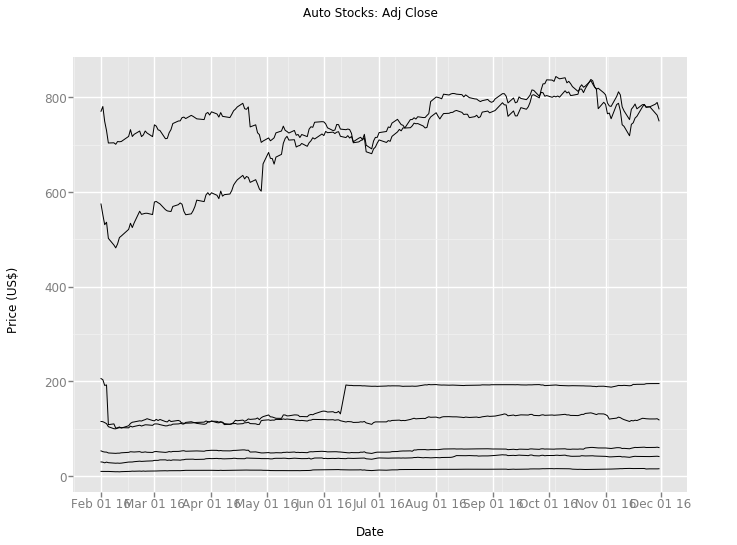

In [77]:
stock_plot = ggplot(df_long, aes(x='Date', y='Price', colors='Stock')) + \
             geom_line() + ylab('Price (US$)') + \
             ggtitle('Auto Stocks: Adj Close') + \
             scale_x_date(labels='%b %d %y',breaks=date_breaks('3 months'))

fig = stock_plot.show()
# ax = fig.gca()
# labels = ax.get_xticklabels()
# for label in labels:
#     labelset_rotation(270)

# plt.show()

###  How to convert data in long format to wide format using pd.pivot()

In [78]:
pivoted = df_long.pivot(index='Date', columns='Stock', values='Price'); pivoted.head(10)

Stock,AMZN,FB,GOOGL,HPQ,LNKD,MSFT,YHOO
Date,,,,,,,
2016-02-01,574.809998,115.089996,770.770020,9.527557,205.759995,52.927964,29.570000
2016-02-02,552.099976,114.610001,780.909973,9.441550,203.429993,51.273663,29.059999
2016-02-03,531.070007,112.690002,749.380005,9.221757,191.250000,50.461024,27.680000
2016-02-04,536.260010,110.489998,730.030029,9.422437,192.279999,50.306236,29.150000
2016-02-05,502.130005,104.070000,703.760010,9.470219,108.379997,48.526169,27.969999
2016-02-08,488.100006,99.750000,704.159973,8.954183,109.970001,47.800598,27.049999
2016-02-09,482.070007,99.540001,701.020020,8.782170,100.980003,47.674832,26.820000
2016-02-10,490.480011,101.000000,706.849976,8.868176,101.760002,48.090826,27.100000
2016-02-11,503.820007,101.910004,706.359985,8.619715,103.470001,48.071477,26.760000


### Using category data type to control sort order


In [83]:
data = pd.DataFrame({
    'medal': ['bronze', 'silver', 'silver', 'gold','bronze', 'bronze', 'gold', 'gold','gold'],
    'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]
}); data

,medal,ounces
0,bronze,4.0
1,silver,3.0
2,silver,12.0
3,gold,6.0
4,bronze,7.5
5,bronze,8.0
6,gold,3.0
7,gold,5.0
8,gold,6.0


In [85]:
data.dtypes

medal      object
ounces    float64
dtype: object

In [86]:
data.sort_values(by=['medal'])

,medal,ounces
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0


In [87]:
data['medal'] = data['medal'].astype("category"); data.dtypes

medal     category
ounces     float64
dtype: object

In [88]:
data.sort_values(by=['medal'])

,medal,ounces
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0


In [91]:
data['medal'].cat.set_categories(['gold', 'silver', 'bronze'], inplace=True); data

,medal,ounces
0,bronze,4.0
1,silver,3.0
2,silver,12.0
3,gold,6.0
4,bronze,7.5
5,bronze,8.0
6,gold,3.0
7,gold,5.0
8,gold,6.0


In [92]:
data.sort_values(by=['medal'])

,medal,ounces
3,gold,6.0
6,gold,3.0
7,gold,5.0
8,gold,6.0
1,silver,3.0
2,silver,12.0
0,bronze,4.0
4,bronze,7.5
5,bronze,8.0


### Merging 2 data frames using merge()

In [95]:
left = pd.DataFrame({
    'group': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
    'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]
}); left

,group,ounces
0,a,4.0
1,a,3.0
2,a,12.0
3,b,6.0
4,b,7.5
5,b,8.0
6,c,3.0
7,c,5.0
8,c,6.0


In [96]:
right = pd.DataFrame({
    'label': ['a','b','c'],
    'value': ['alpha','beta','charlie']
}); right

,label,value
0,a,alpha
1,b,beta
2,c,charlie


In [98]:
# default: inner join
inner_joined = pd.merge(left, right, how='inner', left_on='group', right_on='label'); inner_joined

,group,ounces,label,value
0,a,4.0,a,alpha
1,a,3.0,a,alpha
2,a,12.0,a,alpha
3,b,6.0,b,beta
4,b,7.5,b,beta
5,b,8.0,b,beta
6,c,3.0,c,charlie
7,c,5.0,c,charlie
8,c,6.0,c,charlie


### Finding rows of a data frame containing missing data

In [99]:
df = pd.DataFrame([range(3), [0, np.NaN, 0], [0, 0, np.NaN], range(3), range(3)]); df

,0,1,2
0,0,1.0,2.0
1,0,NaN,0.0
2,0,0.0,NaN
3,0,1.0,2.0
4,0,1.0,2.0


In [100]:
df.isnull()

,0,1,2
0,False,False,False
1,False,True,False
2,False,False,True
3,False,False,False
4,False,False,False


In [101]:
df.isnull().any(axis=1)

0    False
1     True
2     True
3    False
4    False
dtype: bool

In [102]:
df.isnull().any(axis=0)

0    False
1     True
2     True
dtype: bool

In [103]:
df[df.isnull().any(axis=1)]

,0,1,2
1,0,NaN,0.0
2,0,0.0,NaN


### Converting a data type of a column in a data frame

In [105]:
a = [['a', '1.2', '4.2'], ['b', '70', '0.03'], ['x', '5', '0']]
df = pd.DataFrame(a, columns=['one', 'two', 'three']); df

,one,two,three
0,a,1.2,4.2
1,b,70,0.03
2,x,5,0


In [106]:
df.dtypes

one      object
two      object
three    object
dtype: object

In [107]:
df[['two', 'three']]

,two,three
0,1.2,4.2
1,70,0.03
2,5,0


In [108]:
type(df[['two', 'three']])

pandas.core.frame.DataFrame

In [109]:
df[['two', 'three']] = df[['two', 'three']].astype('float')

In [110]:
df.dtypes

one       object
two      float64
three    float64
dtype: object

### Plotting with matplotlib

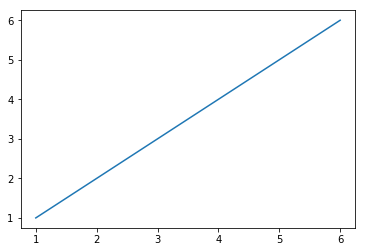

In [111]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"var1":[1,2,3,4,5,6], "var2":[1,2,3,4,5,6]})
plt.plot(df["var1"], df["var2"])
plt.show()

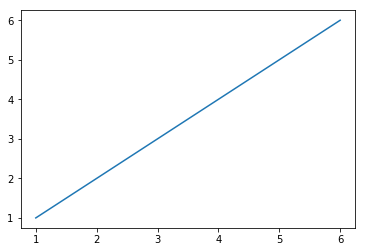

In [114]:
plt.plot("var1", "var2", data=df)
plt.show()

### Plotting data frame directly and creating sub-plots or grouping using column=, by= parameters

In [115]:
import seaborn as sns